In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

df_all = pd.read_csv("../Data/Federal_Funds_Rate.csv")
df_all['DATE'] = pd.to_datetime(df_all.DATE)
df_all['FEDFUNDS'] = df_all.FEDFUNDS.diff(periods=1)
df_all

In [2]:
df_all = pd.read_csv("../Data/Federal_Funds_Rate.csv")
df_all['DATE'] = pd.to_datetime(df_all.DATE)

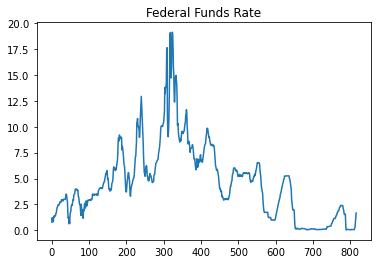

In [3]:
#Visualizing the target variable
fig, ax = plt.subplots()
ax.plot(df_all.FEDFUNDS)
ax.set_title("Federal Funds Rate");

In [4]:
###Running the Dickey-Fuller Test to check if data is stationary or not, p-value is second value. P-value above the .05 
##threshold at .061, so FEDFUNDs must be transformed to become stationary
dftest = adfuller(df_all.FEDFUNDS)
print(dftest)

(-2.7757774986763373, 0.06181794891691074, 17, 799, {'1%': -3.4385608049885876, '5%': -2.865164107438179, '10%': -2.5686998068142124}, 926.1124438782902)


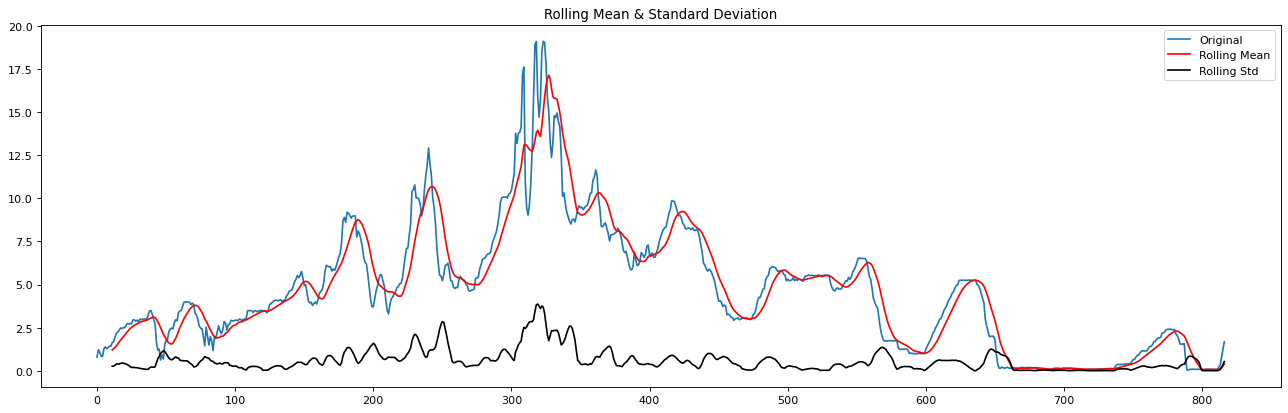

In [5]:
##Visual proof that Fed Funds rate data is non-stationary 
rolmean = df_all.FEDFUNDS.rolling(window=12).mean()
rolstd = df_all.FEDFUNDS.rolling(window=12).std()

# Plot rolling statistics:
figure(figsize=(20, 6), dpi=80)
orig = plt.plot(df_all.FEDFUNDS, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


Coming back to the stationary definition, what makes our current series non stationary?

A Stationary data set is one where the mean, variance, and covariance are not a function of time and remain constant.

Trend - The mean for our series is not constant, it varies over time with a large spike at the 300-350 data point (late 70's early 80s). This is a time period of high inflation within the US. 

Cyclically - The values of our series vary over time with an unspecific pattern over time, this is called cyclicality. 

In [6]:
df_all['FEDFUNDS'] = df_all.FEDFUNDS.diff(periods=1)

df1 = pd.read_csv('../Data/CPI.csv')
df1['DATE'] = pd.to_datetime(df1.DATE)
df_all = df_all.merge(df1, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')
df_all.CPIAUCSL = df_all.CPIAUCSL.interpolate()

df2 = pd.read_csv('../Data/GDP_Quarterly_Real.csv')
df2['DATE'] = pd.to_datetime(df2.DATE)
df2 = df2.set_index(pd.to_datetime(df2['DATE']), drop=True)
df2.drop('DATE', axis=1, inplace=True)
df2 = df2.resample('MS').interpolate()
df_all = df_all.merge(df2, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df3 = pd.read_csv('../Data/Unemployment_Rate.csv')
df3['DATE'] = pd.to_datetime(df3.DATE)
df_all = df_all.merge(df3, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df4 = pd.read_csv('../Data/Population_Over55.csv')
df4['DATE'] = pd.to_datetime(df4.DATE)
df_all = df_all.merge(df4, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df5 = pd.read_csv('../Data/Population_WorkingAge.csv')
df5['DATE'] = pd.to_datetime(df5.DATE)
df_all = df_all.merge(df5, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df6 = pd.read_csv('../Data/M1_MoneySupply.csv')
df6['DATE'] = pd.to_datetime(df6.DATE)
df_all = df_all.merge(df6, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df7 = pd.read_csv('../Data/M2_MoneySupply.csv')
df7['DATE'] = pd.to_datetime(df7.DATE)
df_all = df_all.merge(df7, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')
df_all

df8 = pd.read_csv('../Data/M2_velocity_quarterly.csv')
df8['DATE'] = pd.to_datetime(df8.DATE)
df8 = df8.set_index(pd.to_datetime(df8['DATE']), drop=True)
df8.drop('DATE', axis=1, inplace=True)
df8 = df8.resample('MS').interpolate()
df_all = df_all.merge(df8, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df9 = pd.read_csv('../Data/Population_Total.csv')
df9['DATE'] = pd.to_datetime(df9.DATE)
df_all = df_all.merge(df9, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df10 = pd.read_csv('../Data/Debt_to_GDP_Quarterly.csv')
df10['DATE'] = pd.to_datetime(df10.DATE)
df10 = df10.set_index(pd.to_datetime(df10['DATE']), drop=True)
df10.drop('DATE', axis=1, inplace=True)
df10 = df10.resample('MS').interpolate()
df_all = df_all.merge(df10, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df11 = pd.read_csv('../Data/Federal_Debt_Quarterly.csv')
df11['DATE'] = pd.to_datetime(df11.DATE)
df11 = df11.set_index(pd.to_datetime(df11['DATE']), drop=True)
df11.drop('DATE', axis=1, inplace=True)
df11 = df11.resample('MS').interpolate()
df_all = df_all.merge(df11, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

In [7]:
df12 = pd.read_csv('../Data/USDJPY_monthly.csv')
df12['DATE'] = pd.to_datetime(df12.DATE)
df_all = df_all.merge(df12, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df13 = pd.read_csv('../Data/Core_CPI.csv')
df13['DATE'] = pd.to_datetime(df13.DATE)
df_all = df_all.merge(df13, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df14 = pd.read_csv('../Data/Inital_Claims_4WeekMA.csv')
df14['DATE'] = pd.to_datetime(df14.DATE)
df14 = df14.set_index(pd.to_datetime(df14['DATE']), drop=True)
df14.drop('DATE', axis=1, inplace=True)
df14 = df14.resample('MS').mean()
df_all = df_all.merge(df14, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df15 = pd.read_csv('../Data/Continuing_Claims_4WeekMA.csv')
df15['DATE'] = pd.to_datetime(df15.DATE)
df15 = df15.set_index(pd.to_datetime(df15['DATE']), drop=True)
df15.drop('DATE', axis=1, inplace=True)
df15 = df15.resample('MS').mean()
df_all = df_all.merge(df15, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df16 = pd.read_csv('../Data/Mortgage_Rate_Weekly.csv')
df16['DATE'] = pd.to_datetime(df16.DATE)
df16 = df16.set_index(pd.to_datetime(df16['DATE']), drop=True)
df16.drop('DATE', axis=1, inplace=True)
df16 = df16.resample('MS').mean()
df_all = df_all.merge(df16, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df17 = pd.read_csv('../Data/Capacity_Utilization_Ind.csv')
df17['DATE'] = pd.to_datetime(df17.DATE)
df_all = df_all.merge(df17, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df18 = pd.read_csv('../Data/Total_Nonfarmpayrolls.csv')
df18['DATE'] = pd.to_datetime(df18.DATE)
df_all = df_all.merge(df18, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df19 = pd.read_csv('../Data/PPI_AllCommods.csv')
df19['DATE'] = pd.to_datetime(df19.DATE)
df_all = df_all.merge(df19, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df20 = pd.read_csv('../Data/Total_ConsumerCredit.csv')
df20['DATE'] = pd.to_datetime(df20.DATE)
df_all = df_all.merge(df20, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df21 = pd.read_csv('../Data/SPOT_WTI.csv')
df21['DATE'] = pd.to_datetime(df21.DATE)
df_all = df_all.merge(df21, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df22 = pd.read_csv('../Data/Motor_VehicleLoans.csv')
df22['DATE'] = pd.to_datetime(df22.DATE)
df22 = df22.set_index(pd.to_datetime(df22['DATE']), drop=True)
df22.drop('DATE', axis=1, inplace=True)
df22 = df22.resample('MS').interpolate()
df_all = df_all.merge(df22, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df23 = pd.read_csv('../Data/Federal_InterestPayments.csv')
df23['DATE'] = pd.to_datetime(df23.DATE)
df23 = df23.set_index(pd.to_datetime(df23['DATE']), drop=True)
df23.drop('DATE', axis=1, inplace=True)
df23 = df23.resample('MS').interpolate()
df_all = df_all.merge(df23, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df24 = pd.read_csv('../Data/Federal_TaxReceipts.csv')
df24['DATE'] = pd.to_datetime(df24.DATE)
df24 = df24.set_index(pd.to_datetime(df24['DATE']), drop=True)
df24.drop('DATE', axis=1, inplace=True)
df24 = df24.resample('MS').interpolate()
df_all = df_all.merge(df24, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')
df_all

,DATE,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,...,CC4WSA,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA
0,1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN
1,1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN
2,1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN
3,1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN
4,1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2022-04-01,0.13,288.663,19681.682,3.6,98528.0,127126.0,20615.3,21655.5,1.147,...,1449500.0,4.9825,80.4220,151224.0,265.385,4563.48947,101.78,1365.13043,599.097,NaN
1312,2022-05-01,0.44,291.474,NaN,3.6,98646.0,127115.0,20620.7,21684.4,NaN,...,1338312.5,5.2300,80.3335,151610.0,273.270,4587.28211,109.55,NaN,NaN,NaN
1313,2022-06-01,0.44,295.328,NaN,3.6,98779.0,127121.0,20545.4,21667.5,NaN,...,1320937.5,5.5220,80.0490,152008.0,282.360,4627.43653,114.84,NaN,NaN,NaN
1314,2022-07-01,0.47,295.328,NaN,3.5,98908.0,127149.0,NaN,NaN,NaN,...,1358187.5,5.4125,NaN,152536.0,NaN,NaN,101.62,NaN,NaN,NaN


In [8]:
df_all.set_index('DATE', inplace=True)

In [9]:
##Forward filling the 3 variables that most recent data points end 1/1/2022 to forward 4/1/2022
df_all.GFDEGDQ188S = df_all.GFDEGDQ188S.ffill()
df_all.GFDEBTN = df_all.GFDEBTN.ffill()
df_all.W006RC1Q027SBEA = df_all.W006RC1Q027SBEA.ffill()

In [10]:
##Displays all columns
##pd.set_option('display.max_columns', None)
##resets max columns
##pd.reset_option("^display")

In [11]:
df_all['Fed_Int_Over_Receipts'] = (df_all['A091RC1Q027SBEA'] / df_all['W006RC1Q027SBEA'])
df_all

,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,POPTHM,...,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA,Fed_Int_Over_Receipts
DATE,,,,,,,,,,,,,,,,,,,,,
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,0.13,288.663,19681.682,3.6,98528.0,127126.0,20615.3,21655.5,1.147,332863.0,...,4.9825,80.4220,151224.0,265.385,4563.48947,101.78,1365.13043,599.097,2913.013,0.205662
2022-05-01,0.44,291.474,NaN,3.6,98646.0,127115.0,20620.7,21684.4,NaN,332928.0,...,5.2300,80.3335,151610.0,273.270,4587.28211,109.55,NaN,NaN,2913.013,NaN
2022-06-01,0.44,295.328,NaN,3.6,98779.0,127121.0,20545.4,21667.5,NaN,333028.0,...,5.5220,80.0490,152008.0,282.360,4627.43653,114.84,NaN,NaN,2913.013,NaN


Chose 4/1/2022 data end date because it represents the best date. Encompasses the beginning of the rate hiking cycle (shows in march monthly fed funds rate increase) while also limiting the ffills to only three variables. If chose 7/1/2022 end date, would need to forward fill 12 independent variables. 

In [12]:
df_all = df_all['1971-07-01':'2022-04-01']

In [13]:
##final data set
df_all

,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,POPTHM,...,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA,Fed_Int_Over_Receipts
DATE,,,,,,,,,,,,,,,,,,,,,
1971-07-01,0.40,40.600,5142.422000,6.0,38011.0,70789.0,224.9,679.6,1.717000,207771.0,...,7.6040,79.2256,71315.0,38.300,139.90802,3.56,39.412000,35.408000,135.276000,0.261746
1971-08-01,0.26,40.700,5146.463667,6.1,38070.0,70938.0,225.6,685.5,1.708000,207998.0,...,7.6975,78.5675,71373.0,38.500,141.25209,3.56,39.781000,35.616000,136.066667,0.261754
1971-09-01,-0.02,40.800,5150.505333,6.0,38142.0,71087.0,226.5,692.5,1.699000,208230.0,...,7.6875,79.6440,71614.0,38.300,142.76657,3.56,40.150000,35.824000,136.857333,0.261762
1971-10-01,-0.35,40.900,5154.547000,5.8,38214.0,71238.0,227.2,698.4,1.690000,208450.0,...,7.6280,80.0392,71642.0,38.300,143.92676,3.56,40.519000,36.032000,137.648000,0.261769
1971-11-01,-0.29,41.000,5186.143667,6.0,38273.0,71362.0,227.8,704.6,1.692000,208648.0,...,7.5500,80.1781,71847.0,38.300,145.63484,3.56,41.236667,36.197333,141.976000,0.254954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.00,280.126,19754.042000,3.9,98741.0,126205.0,20430.7,21490.0,1.124333,332640.0,...,3.0980,78.7416,149240.0,241.338,4430.82582,71.71,1326.600173,554.535667,2814.255000,0.197045
2022-01-01,0.00,281.933,19727.918000,4.0,98159.0,127164.0,20585.4,21649.6,1.124000,332684.0,...,3.4450,78.9421,149744.0,246.453,4446.72147,83.22,1332.846310,561.075000,2913.013000,0.192610
2022-02-01,0.00,284.182,19712.506000,3.8,98255.0,127180.0,20661.3,21708.6,1.131667,332750.0,...,3.7625,79.4912,150458.0,252.660,4481.40108,91.64,1343.607683,573.749000,2913.013000,0.196961


In [14]:
##zero nulls within the data set 
df_all.isna().sum()

FEDFUNDS                 0
CPIAUCSL                 0
GDPC1                    0
UNRATE                   0
LNU00024230              0
LNU00000060              0
M1SL                     0
M2SL                     0
M2V                      0
POPTHM                   0
GFDEGDQ188S              0
GFDEBTN                  0
EXJPUS                   0
CPILFESL                 0
IC4WSA                   0
CC4WSA                   0
MORTGAGE30US             0
TCU                      0
PAYEMS                   0
PPIACO                   0
TOTALSL                  0
WTISPLC                  0
MVLOAS                   0
A091RC1Q027SBEA          0
W006RC1Q027SBEA          0
Fed_Int_Over_Receipts    0
dtype: int64

In [15]:
##testing again to see if our target variable is stationary after differencing
dftest = adfuller(df_all.FEDFUNDS)
print(dftest)

(-4.9126323792732345, 3.295270574890884e-05, 16, 593, {'1%': -3.4414256033746606, '5%': -2.8664262627821473, '10%': -2.569372254520843}, 767.307707630913)


In [16]:
df_all.corr()

,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,POPTHM,...,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA,Fed_Int_Over_Receipts
FEDFUNDS,1.000000,-0.030399,-0.013340,-0.095485,-0.013014,-0.034772,0.004262,-0.010721,0.001818,-0.022521,...,-0.030229,0.171588,-0.021494,-0.030054,-0.014966,-0.022892,-0.013746,-0.034935,-0.010881,-0.069750
CPIAUCSL,-0.030399,1.000000,0.989651,-0.210664,0.942745,0.952449,0.555122,0.907371,-0.360915,0.995462,...,-0.762352,-0.502634,0.977568,0.981516,0.959330,0.743402,0.965063,0.966331,0.963727,-0.390428
GDPC1,-0.013340,0.989651,1.000000,-0.272596,0.955921,0.928753,0.558677,0.921452,-0.395443,0.996306,...,-0.811766,-0.476256,0.973181,0.963996,0.979991,0.738625,0.985875,0.941313,0.977608,-0.499878
UNRATE,-0.095485,-0.210664,-0.272596,1.000000,-0.172027,-0.257090,-0.087310,-0.188767,-0.131357,-0.223457,...,0.288815,-0.524210,-0.355304,-0.130903,-0.243469,0.082480,-0.290654,-0.291155,-0.328760,0.282321
LNU00024230,-0.013014,0.942745,0.955921,-0.172027,1.000000,0.801714,0.649828,0.979398,-0.628671,0.948692,...,-0.765858,-0.517688,0.880451,0.943392,0.989156,0.739308,0.969273,0.888606,0.964384,-0.512297
LNU00000060,-0.034772,0.952449,0.928753,-0.257090,0.801714,1.000000,0.389227,0.750093,-0.083743,0.944402,...,-0.708737,-0.431117,0.977431,0.906557,0.843386,0.639842,0.874736,0.940790,0.868019,-0.257136
M1SL,0.004262,0.555122,0.558677,-0.087310,0.649828,0.389227,1.000000,0.783331,-0.656096,0.532308,...,-0.462695,-0.265914,0.463973,0.569459,0.637061,0.350783,0.629945,0.531890,0.651543,-0.343879
M2SL,-0.010721,0.907371,0.921452,-0.188767,0.979398,0.750093,0.783331,1.000000,-0.682684,0.907223,...,-0.757502,-0.476950,0.836047,0.906898,0.970514,0.675362,0.952803,0.861178,0.953644,-0.512810
M2V,0.001818,-0.360915,-0.395443,-0.131357,-0.628671,-0.083743,-0.656096,-0.682684,1.000000,-0.368265,...,0.398613,0.387072,-0.210543,-0.414764,-0.554329,-0.367516,-0.492443,-0.286595,-0.470336,0.388758
POPTHM,-0.022521,0.995462,0.996306,-0.223457,0.948692,0.944402,0.532308,0.907223,-0.368265,1.000000,...,-0.798363,-0.506524,0.976280,0.970085,0.969357,0.739908,0.973686,0.949839,0.966514,-0.457857


As we can see above, after testing our target variable and 3 key independent variables we can confirm that the data is not stationary, and needs to be transformed. (Does not reach the .05 p-value threshold)

In [ ]:
##for column in df_all_diff:
  ###  print(adfuller(df_all_diff[column]))

P-values have moved lower than the .05 p-value threshold. Most of DateFrame df_all_diff is stationary. Need to further transform column 5, 6, 10, 12, 14, 23 (LNU00024230, LNU00000060, POPTHM, GFDEBTN, CPILFESL, MVLOAS). Population, federal debt, Core CPI, motor vehicle loans

##  Autocorrelation Function

* Autocorrelation shows the degree of similarity between a time series and a lagged version of itself over successive time intervals.
* Autocorrelation measures the relationship between a variable’s current value and its past values.
* Autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.
* This means that Processes with greater autocorrelation are more predictable than those without any form of autocorrelation. 

In [ ]:
##Using the Autocorrelation Function to check how each time series observation is related to its past
plot_acf(df_all.FEDFUNDS, lags=50)
plt.show()

In [ ]:
##Using the Autocorrelation Function to check how each time series observation is related to its past, (diff visual)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_all.FEDFUNDS);

As we can see above, there is a large variance in the autocorrelation of the federal funds rate depending upon lag period time length. A lag period of less than 24 months appears to have a higher variance in autocorrelation than longer length lags. Also, the autocorrelation seems to be centered around the value zero, and there appears to be no lag period and its multiple that would be considered statistically significant(a lag period where there is a clear trend). 

## Partial Autocorrelation Function

In [ ]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(df_all.FEDFUNDS, lags=50);

In [ ]:
##Seasonal Decomposition 
res = seasonal_decompose(df_all.FEDFUNDS, model = "additive",period = 30)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "Trend")
res.resid.plot(ax=ax2,ylabel = "Residual")
res.seasonal.plot(ax=ax3,ylabel = "Seasonality")
plt.show()

In [17]:
##white noise model (FSM)
df_FF = pd.read_csv("../Data/Federal_Funds_Rate.csv")
df_FF

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
812,2022-03-01,0.20
813,2022-04-01,0.33
814,2022-05-01,0.77
815,2022-06-01,1.21


In [18]:
##WHite noise model
n_months = 610
date_series = pd.date_range(start='07/01/1971', periods=n_months, freq='MS')
date_series

DatetimeIndex(['1971-07-01', '1971-08-01', '1971-09-01', '1971-10-01',
               '1971-11-01', '1971-12-01', '1972-01-01', '1972-02-01',
               '1972-03-01', '1972-04-01',
               ...
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01'],
              dtype='datetime64[ns]', length=610, freq='MS')

In [19]:
df_FF.mean()

FEDFUNDS    4.604223
dtype: float64

In [20]:
df_FF.std()

FEDFUNDS    3.626953
dtype: float64

In [21]:
avg_ff = 4.604223
std_ff = 3.626953

ff_series = np.random.normal(avg_ff, std_ff, n_months)
ff_series

array([ 1.54631089e+00,  1.06581255e+00,  1.30380835e+00,  3.45220575e+00,
       -1.09973036e+00,  7.58269112e+00,  7.68079893e+00,  8.72484270e+00,
        7.17245079e+00,  4.01331473e-01,  3.35471740e+00,  4.86610793e+00,
        1.55809091e+01,  3.41133506e+00,  6.21850474e+00,  4.80247700e+00,
        6.22254663e+00,  4.74764626e+00,  2.26119493e+00,  6.93640963e+00,
        1.02945772e+01,  1.15004876e+00,  3.73535114e+00,  7.01771140e+00,
        1.98059072e+00,  3.22564687e+00,  5.76653404e+00,  8.87440439e+00,
        6.96344303e-01,  6.03611970e+00, -2.15778064e+00,  2.69429508e+00,
        2.16073376e+00,  7.79914620e+00,  5.77726787e+00,  3.21853526e+00,
        3.52150459e+00,  9.10821897e+00,  5.41418645e+00, -3.24587958e-01,
        3.96811195e+00,  1.21979801e+01,  3.09513072e+00,  5.62967605e+00,
       -2.19925950e+00,  3.32898225e+00,  2.50159176e+00,  8.27372184e+00,
       -2.27450115e-01,  5.40402671e+00,  2.58466794e+00,  2.99926994e+00,
        6.73818048e+00,  

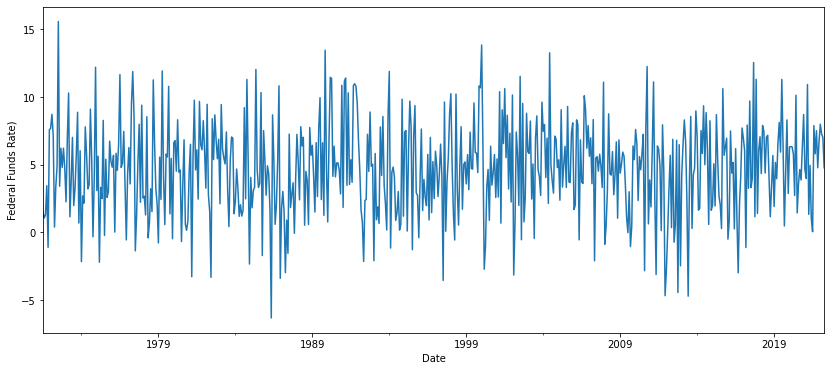

In [22]:
time_series = pd.Series(data=ff_series, index=date_series)


ax = time_series.plot(figsize=(14, 6))
ax.set_ylabel("Federal Funds Rate)")
ax.set_xlabel("Date")
plt.show()

Federal Funds time series appears to probably not be white noise as the mean/level is non-zero and changes over time,
as well as variance which changes over time. Given that the series is not white noise, we suggest that improvements could be made to the predictive model.

In [ ]:
avg = 0
std = 10
n_pts = 2000

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg, std, n_pts)

# Generate data starting at y0 & "walk" based on epsilon (white noise model)
y0 = 0
vals = y0 + np.cumsum(epsilon) 
time_series = pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14, 6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

In [ ]:
b

## Modeling

In [23]:
##df_FF_modeling = df_randomwalk['1971-07-01':'2022-04-01']
df_FF['DATE'] = pd.to_datetime(df_FF.DATE)
df_FF = df_FF.set_index(pd.to_datetime(df_FF['DATE']), drop=True)
df_FF.drop('DATE', axis=1, inplace=True)
df_FF = df_FF['1971-07-01':'2022-04-01']
df_FF

,FEDFUNDS
DATE,
1971-07-01,5.31
1971-08-01,5.57
1971-09-01,5.55
1971-10-01,5.20
1971-11-01,4.91
...,...
2021-12-01,0.08
2022-01-01,0.08
2022-02-01,0.08


In [28]:
# find the index which allows us to split off 20% of the data
df_cutoff = round(df_FF.shape[0]*0.70)
df_cutoff

427

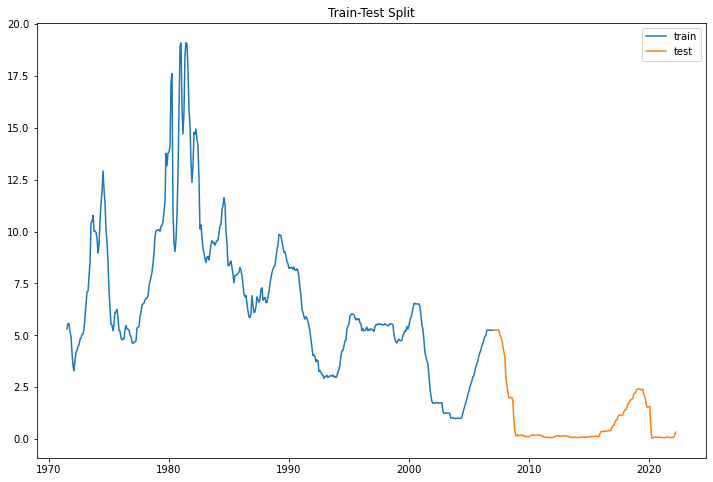

In [29]:
train = df_FF[:df_cutoff]

test = df_FF[df_cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [30]:
split = TimeSeriesSplit()

for train_ind, val_ind in split.split(train):
    print(train_ind, val_ind)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] [ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 

In [31]:
train

,FEDFUNDS
DATE,
1971-07-01,5.31
1971-08-01,5.57
1971-09-01,5.55
1971-10-01,5.20
1971-11-01,4.91
...,...
2006-09-01,5.25
2006-10-01,5.25
2006-11-01,5.25


In [32]:
test

,FEDFUNDS
DATE,
2007-02-01,5.26
2007-03-01,5.26
2007-04-01,5.25
2007-05-01,5.25
2007-06-01,5.25
...,...
2021-12-01,0.08
2022-01-01,0.08
2022-02-01,0.08


In [33]:
train_ind

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [35]:
val_ind

array([356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
       382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407,
       408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420,
       421, 422, 423, 424, 425, 426])

In [38]:
naive = train.shift(1)
naive

,FEDFUNDS
DATE,
1971-07-01,NaN
1971-08-01,5.31
1971-09-01,5.57
1971-10-01,5.55
1971-11-01,5.20
...,...
2006-09-01,5.25
2006-10-01,5.25
2006-11-01,5.25
